# Lab 9

## Task 1

### a)

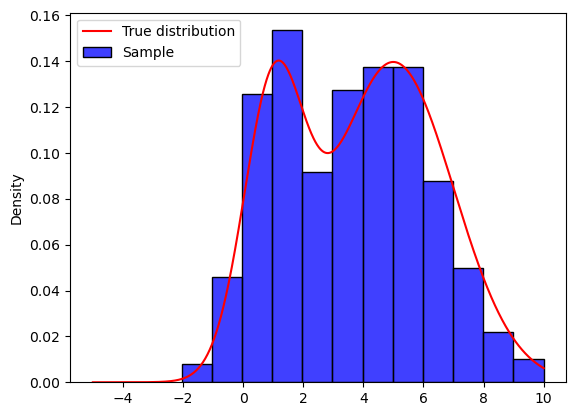

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

n = 500
mu0 = 1
mu1 = 5
sigma0 = 1
sigma1 = 2
pi0 = 0.3
pi1 = 0.7

data = np.random.choice([0, 1], size=n, p=[pi0, pi1])
data = np.array([np.random.normal(mu0, sigma0) if x == 0 else np.random.normal(mu1, sigma1) for x in data])

sns.histplot(data, kde=False, stat='density', color='blue', label='Sample')

x = np.linspace(-5, 10, 1000)
y = pi0 * norm.pdf(x, mu0, sigma0) + pi1 * norm.pdf(x, mu1, sigma1)
plt.plot(x, y, color='red', label='True distribution')
plt.legend()
plt.show()


### b)

In [3]:

def loglikelihood(x, g, mu0, sigma0, mu1, sigma1, pi0, pi1):
    return np.sum((1 - g) * (np.log(norm.pdf(x, mu0, np.sqrt(sigma0))) + np.log(pi0)) + g * (np.log(norm.pdf(x, mu1, np.sqrt(sigma1))) + np.log(pi1)))



### c)

In [8]:
# E step
def e_step(x, mu0, sigma0, mu1, sigma1, pi0, pi1):
    return pi1 * norm.pdf(x, mu1, np.sqrt(sigma1)) / (pi0 * norm.pdf(x, mu0, np.sqrt(sigma0)) + pi1 * norm.pdf(x, mu1, np.sqrt(sigma1)))

### d)

In [9]:
# M step
def m_step(x, g, mu0, sigma0, mu1, sigma1, pi0, pi1):
    mu0_new = np.sum((1 - g) * x) / np.sum(1 - g)
    mu1_new = np.sum(g * x) / np.sum(g)
    sigma0_new = np.sum((1 - g) * (x - mu0) ** 2) / np.sum(1 - g)
    sigma1_new = np.sum(g * (x - mu1) ** 2) / np.sum(g)
    pi0_new = np.mean(1 - g)
    pi1_new = np.mean(g)
    return mu0_new, sigma0_new, mu1_new, sigma1_new, pi0_new, pi1_new

### e)

In [21]:
# EM algorithm
def em_algorithm(x, mu0, sigma0, mu1, sigma1, pi0, pi1, tol=1e-6):
    loglik = []
    diff = tol + 1
    while diff > tol:
        gamma = e_step(x, mu0, sigma0, mu1, sigma1, pi0, pi1)
        mu0_new, sigma0_new, mu1_new, sigma1_new, pi0_new, pi1_new = m_step(x, gamma, mu0, sigma0, mu1, sigma1, pi0, pi1)

        loglik.append(loglikelihood(x, gamma, mu0_new, sigma0_new, mu1_new, sigma1_new, pi0_new, pi1_new))
        diff = np.abs(loglik[-1] - loglik[-2]) if len(loglik) > 1 else tol + 1
        
        mu0, sigma0, mu1, sigma1, pi0, pi1 = mu0_new, sigma0_new, mu1_new, sigma1_new, pi0_new, pi1_new
    return mu0, sigma0, mu1, sigma1, pi0, pi1, loglik

### f)

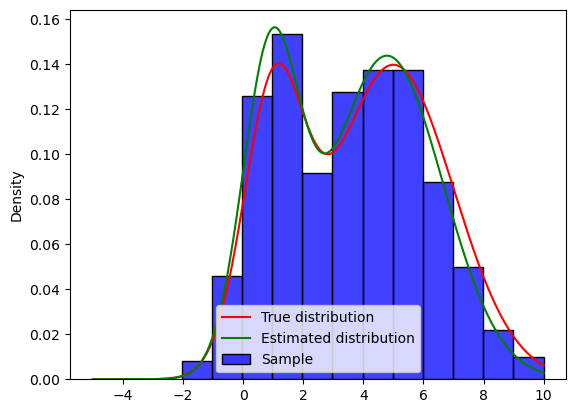

In [23]:
mu0_hat, sigma0_hat, mu1_hat, sigma1_hat, pi0_hat, pi1_hat, loglik = em_algorithm(data, 0.5, 0.5, 1, 1, 0.5, 0.5)

sns.histplot(data, kde=False, stat='density', color='blue', label='Sample')

x = np.linspace(-5, 10, 1000)
y = pi0 * norm.pdf(x, mu0, sigma0) + pi1 * norm.pdf(x, mu1, sigma1)
plt.plot(x, y, color='red', label='True distribution')

y_hat = pi0_hat * norm.pdf(x, mu0_hat, np.sqrt(sigma0_hat)) + pi1_hat * norm.pdf(x, mu1_hat, np.sqrt(sigma1_hat))
plt.plot(x, y_hat, color='green', label='Estimated distribution')

plt.legend()
plt.show()
